In [20]:
import sqlite3
import time

# SQLite connection
conn = sqlite3.connect('sqlite_test.db')
cursor = conn.cursor()

# Check if table exists and create if it doesn't
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='TestTable'")
if not cursor.fetchone():
    # CREATE operation
    start_time = time.time()
    cursor.execute("CREATE TABLE TestTable (ID INTEGER, Data TEXT)")
    conn.commit()
    create_time = time.time() - start_time
else:
    create_time = 0  # Table already exists

# INSERT operation
start_time = time.time()
cursor.execute("INSERT INTO TestTable (ID, Data) VALUES (1, 'TestData')")
conn.commit()
insert_time = time.time() - start_time

# Create an additional table
cursor.execute("""
CREATE TABLE IF NOT EXISTS DetailsTable (
    DetailID INTEGER PRIMARY KEY,
    TestTableID INTEGER,
    DetailData TEXT,
    FOREIGN KEY (TestTableID) REFERENCES TestTable(ID)
)
""")
conn.commit()

# Insert data into DetailsTable
cursor.execute("INSERT INTO DetailsTable (TestTableID, DetailData) VALUES (1, 'Detail for 1')")
conn.commit()
# READ operation
start_time = time.time()
cursor.execute("SELECT * FROM TestTable")
cursor.fetchall()
read_time = time.time() - start_time

# Complex Query with JOIN and Aggregation
cursor.execute("""
    SELECT tt.ID, tt.Data, COUNT(dt.DetailID) as DetailCount
    FROM TestTable tt
    LEFT JOIN DetailsTable dt ON tt.ID = dt.TestTableID
    GROUP BY tt.ID, tt.Data
""")
results = cursor.fetchall()
for row in results:
    print(row)


# UPDATE operation
start_time = time.time()
cursor.execute("UPDATE TestTable SET Data = 'UpdatedData' WHERE ID = 1")
conn.commit()
update_time = time.time() - start_time

# DELETE operation
start_time = time.time()
cursor.execute("DELETE FROM TestTable WHERE ID = 1")
conn.commit()
delete_time = time.time() - start_time

# Close connection
conn.close()

# Print timings
print(f"Create: {create_time}, Insert: {insert_time}, Read: {read_time}, Update: {update_time}, Delete: {delete_time}")


(1, 'TestData', 3)
Create: 0, Insert: 0.007225513458251953, Read: 0.0, Update: 0.00955963134765625, Delete: 0.007318019866943359


In [21]:
import sqlite3
import time
import random

# Function to create random data
def random_data(size=1000, length=10):
    return [(''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=length)),) for _ in range(size)]

# Establishing a new database connection
conn = sqlite3.connect('sqlite_test.db')
cursor = conn.cursor()

# Creating multiple tables
cursor.execute("CREATE TABLE IF NOT EXISTS Users (UserID INTEGER PRIMARY KEY AUTOINCREMENT, Username TEXT)")
cursor.execute("CREATE TABLE IF NOT EXISTS Products (ProductID INTEGER PRIMARY KEY AUTOINCREMENT, ProductName TEXT)")
cursor.execute("CREATE TABLE IF NOT EXISTS Sales (SaleID INTEGER PRIMARY KEY AUTOINCREMENT, UserID INTEGER, ProductID INTEGER, SaleAmount REAL, FOREIGN KEY(UserID) REFERENCES Users(UserID), FOREIGN KEY(ProductID) REFERENCES Products(ProductID))")
conn.commit()

# Inserting bulk data into Users and Products
cursor.executemany("INSERT INTO Users (Username) VALUES (?)", random_data(1000, 5))
cursor.executemany("INSERT INTO Products (ProductName) VALUES (?)", random_data(500, 8))
conn.commit()

# Simulating Sales data
users = cursor.execute("SELECT UserID FROM Users").fetchall()
products = cursor.execute("SELECT ProductID FROM Products").fetchall()
sales_data = [(random.choice(users)[0], random.choice(products)[0], random.uniform(10.0, 500.0)) for _ in range(5000)]

cursor.executemany("INSERT INTO Sales (UserID, ProductID, SaleAmount) VALUES (?, ?, ?)", sales_data)
conn.commit()

# Complex Query: Total sales amount per user
complex_query_1 = """
SELECT Users.Username, SUM(Sales.SaleAmount) AS TotalSales
FROM Users
JOIN Sales ON Users.UserID = Sales.UserID
GROUP BY Users.UserID
ORDER BY TotalSales DESC
LIMIT 10;
"""

# Complex Query: Average sale amount per product
complex_query_2 = """
SELECT Products.ProductName, AVG(Sales.SaleAmount) AS AverageSale
FROM Products
JOIN Sales ON Products.ProductID = Sales.ProductID
GROUP BY Products.ProductID
ORDER BY AverageSale DESC
LIMIT 10;
"""

# Timers for complex queries
start_time_1 = time.time()
cursor.execute(complex_query_1)
query_results_1 = cursor.fetchall()
query_time_1 = time.time() - start_time_1

start_time_2 = time.time()
cursor.execute(complex_query_2)
query_results_2 = cursor.fetchall()
query_time_2 = time.time() - start_time_2

# Closing the connection
conn.close()

# Output results
print("Top 10 Users by Total Sales:")
for row in query_results_1:
    print(row)

print(f"Query Execution Time: {query_time_1} seconds\n")

print("Top 10 Products by Average Sale:")
for row in query_results_2:
    print(row)

print(f"Query Execution Time: {query_time_2} seconds")


Top 10 Users by Total Sales:
('GZUVS', 7472.578827206479)
('FFCTZ', 7339.309647742177)
('JKVFE', 7193.966617922856)
('MKBAN', 7099.389455189317)
('OBSTN', 6662.278718506939)
('FLBGS', 6532.2982896332)
('ASPYR', 6404.506207983642)
('FKULB', 6321.4785683554055)
('GFQOY', 6206.893263883737)
('XAVKB', 6191.263730440397)
Query Execution Time: 0.07824993133544922 seconds

Top 10 Products by Average Sale:
('Product_84', 492.9976872900637)
('BJWGXWUS', 492.7140764765443)
('RTRZRICD', 491.82273159847296)
('XLVGQYVQ', 490.622427925451)
('DXOJVNAT', 486.93031077711885)
('Product_75', 484.58427753419437)
('TVZCXNUM', 480.72168840870324)
('Product_35', 477.55234248018525)
('TSNBBVKO', 471.232420290685)
('UKAKVOTV', 471.04448831762005)
Query Execution Time: 0.041498661041259766 seconds


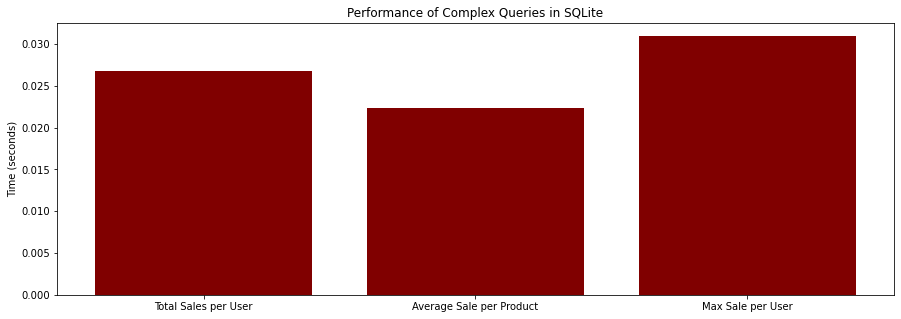

In [22]:
import sqlite3
import time
import random
import matplotlib.pyplot as plt

# Open a connection to the SQLite database
conn = sqlite3.connect('sqlite_test.db')
cursor = conn.cursor()

# Create tables
cursor.execute("CREATE TABLE IF NOT EXISTS Users (UserID INTEGER PRIMARY KEY, Username TEXT)")
cursor.execute("CREATE TABLE IF NOT EXISTS Products (ProductID INTEGER PRIMARY KEY, ProductName TEXT)")
cursor.execute("CREATE TABLE IF NOT EXISTS Sales (SaleID INTEGER PRIMARY KEY, UserID INTEGER, ProductID INTEGER, SaleAmount REAL, FOREIGN KEY(UserID) REFERENCES Users(UserID), FOREIGN KEY(ProductID) REFERENCES Products(ProductID))")
conn.commit()

# Insert data into Users and Products
for i in range(100):
    cursor.execute("INSERT INTO Users (Username) VALUES (?)", (f'User_{i}',))
    cursor.execute("INSERT INTO Products (ProductName) VALUES (?)", (f'Product_{i}',))
conn.commit()

# Insert data into Sales
for _ in range(1000):
    user_id = random.randint(1, 100)
    product_id = random.randint(1, 100)
    sale_amount = random.uniform(10.0, 100.0)
    cursor.execute("INSERT INTO Sales (UserID, ProductID, SaleAmount) VALUES (?, ?, ?)", (user_id, product_id, sale_amount))
conn.commit()

# Prepare complex queries
queries = {
    'Total Sales per User': "SELECT UserID, SUM(SaleAmount) FROM Sales GROUP BY UserID",
    'Average Sale per Product': "SELECT ProductID, AVG(SaleAmount) FROM Sales GROUP BY ProductID",
    'Max Sale per User': "SELECT UserID, MAX(SaleAmount) FROM Sales GROUP BY UserID"
}

# Execute complex queries and measure execution time
times = {}
for query_name, query_sql in queries.items():
    start_time = time.time()
    cursor.execute(query_sql)
    cursor.fetchall()
    times[query_name] = time.time() - start_time

# Close the database connection
conn.close()

# Visualization
names = list(times.keys())
values = list(times.values())

plt.figure(figsize=(15, 5))
plt.bar(names, values, color='maroon')
plt.ylabel('Time (seconds)')
plt.title('Performance of Complex Queries in SQLite')
plt.show()


In [23]:
import pyodbc
import time

# Azure SQL connection details
# Database connection details
# Database connection details
server = 'abhishiktadbgroup.database.windows.net'
database = 'AbhishiktaGroup'
username = 'abhishikta'
password = 'dbpassword@123'
driver = '{ODBC Driver 18 for SQL Server}'

with pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}') as conn:
    with conn.cursor() as cursor:

        # CREATE operation
        start_time = time.time()
        cursor.execute("""
        IF NOT EXISTS (SELECT * FROM sys.tables WHERE name = 'TestTable' AND type = 'U')
            CREATE TABLE TestTable (ID INTEGER, Data TEXT)
        """)
        conn.commit()

        create_time = time.time() - start_time

        # INSERT operation
        start_time = time.time()
        cursor.execute("INSERT INTO TestTable (ID, Data) VALUES (1, 'TestData')")
        cursor.commit()
        insert_time = time.time() - start_time

        # READ operation
        start_time = time.time()
        cursor.execute("SELECT * FROM TestTable")
        cursor.fetchall()
        read_time = time.time() - start_time

        # UPDATE operation
        start_time = time.time()
        cursor.execute("UPDATE TestTable SET Data = 'UpdatedData' WHERE ID = 1")
        cursor.commit()
        update_time = time.time() - start_time

        # DELETE operation
        start_time = time.time()
        cursor.execute("DELETE FROM TestTable WHERE ID = 1")
        cursor.commit()
        delete_time = time.time() - start_time

# Print timings
print(f"Create: {create_time}, Insert: {insert_time}, Read: {read_time}, Update: {update_time}, Delete: {delete_time}")


Create: 0.0854647159576416, Insert: 0.08292436599731445, Read: 0.046334028244018555, Update: 0.09029674530029297, Delete: 0.09341573715209961


In [24]:
import pyodbc
import time
import random
import string

# Function to generate random data
def generate_random_data(length=10, num_records=1000):
    return [(''.join(random.choices(string.ascii_letters + string.digits, k=length)),) for _ in range(num_records)]

# Azure SQL connection details
server = 'abhishiktadbgroup.database.windows.net'
database = 'AbhishiktaGroup'
username = 'abhishikta'
password = 'dbpassword@123'
driver = '{ODBC Driver 18 for SQL Server}'

# Connect to Azure SQL Database
conn = pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}')
cursor = conn.cursor()

# Creating multiple tables
cursor.execute("IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'Users') CREATE TABLE Users (UserID INT PRIMARY KEY IDENTITY(1,1), Username NVARCHAR(255))")
cursor.execute("IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'Products') CREATE TABLE Products (ProductID INT PRIMARY KEY IDENTITY(1,1), ProductName NVARCHAR(255))")
cursor.execute("IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'Sales') CREATE TABLE Sales (SaleID INT PRIMARY KEY IDENTITY(1,1), UserID INT, ProductID INT, SaleAmount FLOAT, FOREIGN KEY(UserID) REFERENCES Users(UserID), FOREIGN KEY(ProductID) REFERENCES Products(ProductID))")
cursor.commit()

# # Inserting bulk data into Users and Products
# user_data = generate_random_data(5, 1000)
# product_data = generate_random_data(8, 500)

# cursor.executemany("INSERT INTO Users (Username) VALUES (?)", user_data)
# cursor.executemany("INSERT INTO Products (ProductName) VALUES (?)", product_data)
# cursor.commit()

# # Simulating Sales data
# cursor.execute("SELECT UserID FROM Users")
# users = cursor.fetchall()
# cursor.execute("SELECT ProductID FROM Products")
# products = cursor.fetchall()

# sales_data = [(random.choice(users)[0], random.choice(products)[0], random.uniform(10.0, 500.0)) for _ in range(5000)]
# cursor.executemany("INSERT INTO Sales (UserID, ProductID, SaleAmount) VALUES (?, ?, ?)", sales_data)
# cursor.commit()

# Complex Query: Total sales amount per user
complex_query_1 = """
SELECT TOP 10 u.Username, SUM(s.SaleAmount) AS TotalSales
FROM Users u
JOIN Sales s ON u.UserID = s.UserID
GROUP BY u.Username
ORDER BY TotalSales DESC
"""

# Complex Query: Average sale amount per product
complex_query_2 = """
SELECT TOP 10 p.ProductName, AVG(s.SaleAmount) AS AverageSale
FROM Products p
JOIN Sales s ON p.ProductID = s.ProductID
GROUP BY p.ProductName
ORDER BY AverageSale DESC
"""

# Timers for complex queries
start_time_1 = time.time()
cursor.execute(complex_query_1)
query_results_1 = cursor.fetchall()
query_time_1 = time.time() - start_time_1

start_time_2 = time.time()
cursor.execute(complex_query_2)
query_results_2 = cursor.fetchall()
query_time_2 = time.time() - start_time_2

# Closing the connection
conn.close()

# Output results
print("Top 10 Users by Total Sales:")
for row in query_results_1:
    print(row)

print(f"Query Execution Time: {query_time_1} seconds\n")

print("Top 10 Products by Average Sale:")
for row in query_results_2:
    print(row)

print(f"Query Execution Time: {query_time_2} seconds")


Top 10 Users by Total Sales:
('t1md0', 4446.532662423004)
('dLWLR', 4317.743540990652)
('n1rC5', 3691.8819805635353)
('qCyWj', 3565.9586271793128)
('TAaj9', 3530.6740203208337)
('Elj1D', 3527.533044312624)
('hPW7z', 3400.1216831059082)
('kMzxM', 3376.517467469651)
('qC8oh', 3370.465280362254)
('L8kYl', 3363.7854184681223)
Query Execution Time: 0.056357383728027344 seconds

Top 10 Products by Average Sale:
('7mnzaaFC', 404.380986773477)
('0Ye2e5H1', 404.0679692035812)
('1MXTuz7v', 377.31340789860536)
('y0x9jZEG', 376.8456284854925)
('7QuMTB8J', 376.73248415686254)
('pvUvEN9e', 367.68304552605673)
('Mf0y4zT1', 363.7252132199085)
('UTxNPZIv', 361.3792717687345)
('yeLBQLmB', 357.08091027139)
('OS4mqwfB', 351.8637629004421)
Query Execution Time: 0.04667782783508301 seconds


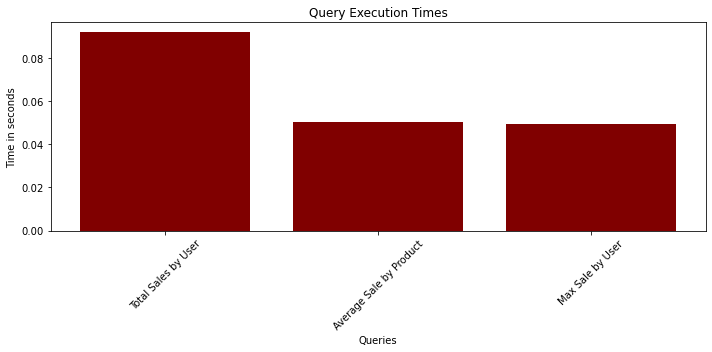

In [26]:
import pyodbc
import time
import random
import string
import matplotlib.pyplot as plt

# Function to generate random data
def generate_random_data(length=10, num_records=1000):
    return [(''.join(random.choices(string.ascii_letters + string.digits, k=length)),) for _ in range(num_records)]
# Function to execute a query and measure time taken
def execute_query(cursor, query):
    start_time = time.time()
    cursor.execute(query)
    results = cursor.fetchall()
    end_time = time.time()
    return results, end_time - start_time

# Azure SQL connection details
server = 'abhishiktadbgroup.database.windows.net'
database = 'AbhishiktaGroup'
username = 'abhishikta'
password = 'dbpassword@123'
driver = '{ODBC Driver 18 for SQL Server}'

# Connect to Azure SQL Database
conn = pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}')
cursor = conn.cursor()

# Creating multiple tables
cursor.execute("""
IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'Users')
BEGIN
    CREATE TABLE Users (UserID INT PRIMARY KEY IDENTITY(1,1), Username NVARCHAR(255))
END
""")
cursor.execute("""
IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'Products')
BEGIN
    CREATE TABLE Products (ProductID INT PRIMARY KEY IDENTITY(1,1), ProductName NVARCHAR(255))
END
""")
cursor.execute("""
IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'Sales')
BEGIN
    CREATE TABLE Sales (SaleID INT PRIMARY KEY IDENTITY(1,1), UserID INT, ProductID INT, SaleAmount FLOAT,
    FOREIGN KEY(UserID) REFERENCES Users(UserID),
    FOREIGN KEY(ProductID) REFERENCES Products(ProductID))
END
""")
cursor.commit()

# Inserting bulk data into Users and Products
user_data = generate_random_data(5, 100)
product_data = generate_random_data(8, 50)
cursor.executemany("INSERT INTO Users (Username) VALUES (?)", user_data)
cursor.executemany("INSERT INTO Products (ProductName) VALUES (?)", product_data)
cursor.commit()

# Simulating Sales data
cursor.execute("SELECT UserID FROM Users")
users = cursor.fetchall()
cursor.execute("SELECT ProductID FROM Products")
products = cursor.fetchall()
sales_data = [(random.choice(users)[0], random.choice(products)[0], random.uniform(10.0, 500.0)) for _ in range(1000)]
cursor.executemany("INSERT INTO Sales (UserID, ProductID, SaleAmount) VALUES (?, ?, ?)", sales_data)
cursor.commit()

# Define complex queries
complex_queries = {
    "Total Sales by User": """
        SELECT TOP 10 u.Username, SUM(s.SaleAmount) AS TotalSales
        FROM Users u
        JOIN Sales s ON u.UserID = s.UserID
        GROUP BY u.Username
        ORDER BY TotalSales DESC
    """,
    "Average Sale by Product": """
        SELECT TOP 10 p.ProductName, AVG(s.SaleAmount) AS AverageSale
        FROM Products p
        JOIN Sales s ON p.ProductID = s.ProductID
        GROUP BY p.ProductName
        ORDER BY AverageSale DESC
    """,
    "Max Sale by User": """
        SELECT TOP 10 u.Username, MAX(s.SaleAmount) AS MaxSale
        FROM Users u
        JOIN Sales s ON u.UserID = s.UserID
        GROUP BY u.Username
        ORDER BY MaxSale DESC
    """
}

# Execute complex queries and measure execution time
query_times = []
for query_name, query_sql in complex_queries.items():
    results, time_taken = execute_query(cursor, query_sql)
    query_times.append((query_name, time_taken))

# Plotting the results
labels, times = zip(*query_times)
plt.figure(figsize=(10, 5))
plt.bar(labels, times, color='maroon')
plt.xlabel('Queries')
plt.ylabel('Time in seconds')
plt.title('Query Execution Times')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close the connection
conn.close()
